In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from collections import namedtuple
import networkx as nx

(1000, 28, 28)

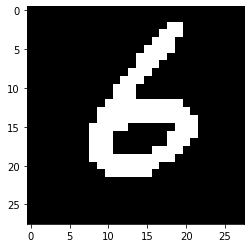

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
dataset=x_train[:1000]



for i in range(1000):
  a = dataset[i]
  # print(a.shape)
  a[a<=127] = 0
  a[a>127] = 1
  dataset[i] = a
plt.imshow(dataset[66], cmap="gray") 

dataset.shape

In [ ]:
dataset=dataset * 1.00
print(dataset.shape)
print(dataset.dtype)

(50, 28, 28)
float64


In [ ]:
import numpy as np

RIGHT = 0
UP = 1
LEFT = 2
DOWN = 3
DIRECTIONS = {"right":RIGHT, "up":UP, "left":LEFT, "down":DOWN}

# message_storage = np.ones(
#     shape = (4, 28, 28),
#     dtype = np.float32 )
# first dimension: which assignment
# second dimension: the messages sent to four directions
# third and forth: the index of the node
message_storage = np.ones(
    shape = (num_assignments, 4, 28, 28),
    dtype = np.float32 )
# second dimension:
# 0: the message sent from this node to its right neighbor
# 1: the message sent from this node to its up neighbor
# 2: the message sent from this node to its left neighbor
# 3: the message sent from this node to its down neighbor

In [ ]:
from numpy.ma.core import exp
theta = 1
def potential(node_1, node_2):
  phi = exp(-(node_1-node_2)**2 / 2 * (theta**2))
  return phi 

potential(0,1)

0.6065306597126334

In [ ]:
def message_passing(img, i, j, direction, which_assignment):
  from_node = img[i,j] # sending node


  if direction == RIGHT:
    if i == 27:
      return    
    to_node = img[i+1,j] # receiving node
    phi = potential(from_node, to_node) # potential

    # the message sent from node_i,j to its RIGHT neighbor 
    # = phi * all messages sent from its neighbors (expect the RIGHT one) into it 
    messgae_left, message_up, message_dowm = 1,1,1
    if i > 0:
      message_left = message_storage[which_assignment, 0, i-1, j]
    if j > 0:
      message_up = message_storage[which_assignment, 3, i, j-1]      
    if j < 27:
      message_down = message_storage[which_assignment, 1, i, j+1] 
      

    messages = phi * messgae_left * message_up * message_dowm
    # if messages == 0:
    #   print("i=",i)
    #   print("j=",j)
    #   print("from_node=",from_node)
    #   print("to_node=",to_node)
    #   print("phi=",potential(from_node, to_node))
    #   print("messgae_left=",messgae_left)
    #   print("message_up=",message_up)
    #   print("message_dowm=",message_dowm)
    #   return
    message_storage[which_assignment, 0, i, j] = messages # store it


  elif direction == UP:
    if j == 0:
      return    
    to_node = img[i,j-1] # receiving node
    phi = potential(from_node, to_node) # potential

    # the message sent from node_i,j to its UP neighbor 
    # = phi * all messages sent from its neighbors (expect the UP one) into it 
    messgae_left, message_right, message_dowm = 1,1,1
    if i > 0:
      message_left = message_storage[which_assignment, 0, i-1, j]
    if i > 27:
      message_right = message_storage[which_assignment, 2, i+1, j]      
    if j < 27:
      message_down = message_storage[which_assignment, 1, i, j+1]   

    messages = phi * messgae_left * message_right * message_dowm
    message_storage[which_assignment, 1, i, j] = messages # store it

  elif direction == LEFT:
    if i == 0:
      return    
    to_node = img[i-1,j] # receiving node
    phi = potential(from_node, to_node) # potential

    # the message sent from node_i,j to its LEFT neighbor 
    # = phi * all messages sent from its neighbors (expect the LEFT one) into it 
    messgae_up, message_right, message_dowm = 1,1,1
    if i < 27:
      message_right = message_storage[which_assignment, 2, i+1, j]
    if j > 0:
      messgae_up = message_storage[which_assignment, 3, i, j-1]          
    if j < 27:
      message_down = message_storage[which_assignment, 1, i, j+1]   

    messages = phi * messgae_up * message_right * message_dowm
    message_storage[which_assignment, 2, i, j] = messages # store it

  elif direction == DOWN:
    if j == 27:
      return    
    to_node = img[i,j+1] # receiving node
    phi = potential(from_node, to_node) # potential

    # the message sent from node_i,j to its DOWN neighbor 
    # = phi * all messages sent from its neighbors (expect the DOWN one) into it 
    message_right, message_left, message_up = 1,1,1
    if i < 27:
      message_right = message_storage[which_assignment, 2, i+1, j]
    if j > 0:
      message_up = message_storage[which_assignment, 3, i, j-1]          
    if i > 0:
      message_left = message_storage[which_assignment, 0, i-1, j]   

    messages = phi * message_right * message_up * message_left
    message_storage[which_assignment, 2, i, j] = messages # store it    

In [ ]:
iteration = 20
def LBP(img, which_assignment):
  for iter in range(iteration):
    for i in range(28):
      for j in range(28):
        message_passing(img, i, j, RIGHT, which_assignment)
        message_passing(img, i, j, UP, which_assignment)
        message_passing(img, i, j, LEFT, which_assignment)
        message_passing(img, i, j, DOWN, which_assignment)
    print(which_assignment,"th assignment, iteration=",iter," is finished.")

In [ ]:
K = 3 # unobserved square size k*k
location_i, location_j = 17, 7 # the location of this square
num_unobs_nodes = K*K
num_assignments = pow(2,num_unobs_nodes)
img = dataset[1]

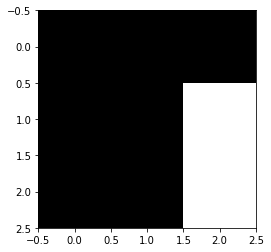

In [ ]:
import itertools
lst = list(itertools.product([0, 1], repeat=num_unobs_nodes))

squares = np.array(lst)
squares = np.reshape(squares,(num_assignments,K,K))
squares.shape
plt.imshow(squares[9], cmap="gray") 

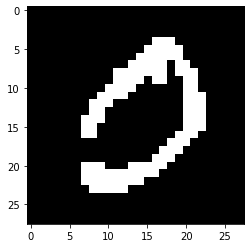

In [ ]:
# replace each square into the image
img_square = np.zeros(
    shape = (num_assignments, 28, 28),
    dtype = np.float32 )
for k in range(num_assignments):
  img_square[k,:,:] = img
  for i in range(K):
    for j in range(K):
      img_square[k, i+location_i, j+location_j] = squares[k,i,j]
plt.imshow(img_square[0], cmap="gray") 


In [ ]:
def messages_for_all_assignments(all_img_square):
  for i in range(num_assignments):
    LBP(all_img_square[i], i)

messages_for_all_assignments(img_square)

0 th assignment, iteration= 0  is finished.
0 th assignment, iteration= 1  is finished.
0 th assignment, iteration= 2  is finished.
0 th assignment, iteration= 3  is finished.
0 th assignment, iteration= 4  is finished.
0 th assignment, iteration= 5  is finished.
0 th assignment, iteration= 6  is finished.
0 th assignment, iteration= 7  is finished.
0 th assignment, iteration= 8  is finished.
0 th assignment, iteration= 9  is finished.
0 th assignment, iteration= 10  is finished.
0 th assignment, iteration= 11  is finished.
0 th assignment, iteration= 12  is finished.
0 th assignment, iteration= 13  is finished.
0 th assignment, iteration= 14  is finished.
0 th assignment, iteration= 15  is finished.
0 th assignment, iteration= 16  is finished.
0 th assignment, iteration= 17  is finished.
0 th assignment, iteration= 18  is finished.
0 th assignment, iteration= 19  is finished.
1 th assignment, iteration= 0  is finished.
1 th assignment, iteration= 1  is finished.
1 th assignment, itera

In [ ]:
all_beliefs=np.ones(
    shape = (num_assignments, K, K),
    dtype = np.float32 )
num_beliefs =np.ones(num_assignments,dtype = np.float32 ) 
for num in range(num_assignments):
  for i in range(K):
    for j in range(K):
      # belief = the product of messages from four directions
      index_i = location_i + i
      index_j = location_j + j
      belief = message_storage[num, 0, index_i-1, index_j] * message_storage[num, 1, index_i, index_j+1] * \
            message_storage[num, 2, index_i+1, index_j] * message_storage[num, 3, index_i, index_j-1]
      all_beliefs[num][i][j] = belief
      num_beliefs[num] = num_beliefs[num] * belief

In [ ]:
sort_belief = []
for i in range(num_assignments):
  item = np.argsort(num_beliefs)[i]
  sort_belief += [item]
sort_belief

In [ ]:
# the filled image with largest belief
plt.imshow(img_square[sort_belief[-1]], cmap="gray") 

In [ ]:
# the filled image with second largest belief
plt.imshow(img_square[sort_belief[-2]], cmap="gray")  

In [ ]:
# the filled image with third largest belief
plt.imshow(img_square[sort_belief[-3]], cmap="gray") 

In [ ]:
# the filled image with smallest belief
plt.imshow(img_square[sort_belief[0]], cmap="gray") 

In [ ]:
# the filled image with second smallest belief
plt.imshow(img_square[sort_belief[1]], cmap="gray") 

In [ ]:
# the filled image with 3rd smallest belief
plt.imshow(img_square[sort_belief[2]], cmap="gray") 

In [ ]:
import torch
from torch import nn
def js_div(p, q):
  p = (p/torch.linalg.norm(p)+1)/2
  q = (q/torch.linalg.norm(q)+1)/2
  KLDivLoss = nn.KLDivLoss(reduction='sum', size_average=False)
  mean = (p + q)/2
  jsd = (KLDivLoss(p.log(), mean) + KLDivLoss(q.log(), mean))/2
  return jsd.item()

In [ ]:
sort_jsd = []
for i in range(num_assignments):
  p = torch.from_numpy(img_square[sort_belief[i]])
  q = torch.from_numpy(img)
  sort_jsd += [js_div(p,q)]


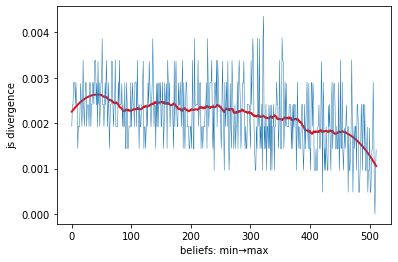

In [ ]:
from scipy.signal import savgol_filter

plt.plot(savgol_filter(sort_jsd, 101, 2), 'r', lw=2,label='tau=0.999')
plt.plot(sort_jsd,lw=0.5)
plt.xlabel("beliefs: min→max")
plt.ylabel("js divergence")
plt.show()